# Imports

In [41]:
# Standard Library Imports
import sys
import os
import random
from pathlib import Path
import glob

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

# Image Processing and Handling
import tifffile as tiff
from PIL import Image
import skimage
from skimage.io import imread, imsave

# Progress Tracking
from tqdm import tqdm

# Custom Module Imports
sys.path.insert(0, '../')
from src.utils import *
from src.config import *
from src.prepare_data import prepare_SPARCS, prepare_biome8, prepare_S2

# Seed Setting
seed_value = 42

# Set the random seed for Python's built-in random module
random.seed(seed_value)

# Set the random seed for numpy
np.random.seed(seed_value)

# Set the random seed for TensorFlow
tf.random.set_seed(seed_value)


# Models trained with SPARCS

## Losses

In [42]:
# # Code to save the YOLO loss
# val = pd.read_csv(results_path / 'yolov8n_pre_epochs300_batch16_Biome/notebooks_runs_segment_yolov8n_pre_epochs300_batch16_Biome_val.csv')
# train = pd.read_csv(results_path / 'yolov8n_pre_epochs300_batch16_Biome/notebooks_runs_segment_yolov8n_pre_epochs300_batch16_Biome.csv')

# plt.plot(train['Step'], train['Value'], 'y', label='Training loss')
# plt.plot(val['Step'], val['Value'], 'r', label='Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.savefig(results_path / 'yolov8n_pre_epochs300_batch16_Biome/loss.png')

In [43]:
# # Code to save the YOLO loss
# val = pd.read_csv(results_path / 'yolov8n_pre_epochs300_batch16_SPARCS/notebooks_runs_segment_yolov8n_pre_epochs300_batch16_SPARCS_val.csv')
# train = pd.read_csv(results_path / 'yolov8n_pre_epochs300_batch16_SPARCS/notebooks_runs_segment_yolov8n_pre_epochs300_batch16_SPARCS.csv')

# plt.plot(train['Step'], train['Value'], 'y', label='Training loss')
# plt.plot(val['Step'], val['Value'], 'r', label='Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.savefig(results_path / 'yolov8n_pre_epochs300_batch16_SPARCS/loss.png')

In [44]:
losses = [dir for dir in glob.glob(str(project_root_path / 'logs/fit/*SPARCS*/*/loss.png'))]
losses

['/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/UNet_SPARCS_epochs300_batch16_RGBNIR/20230829-195335/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/CloudNet_SPARCS_epochs300_batch16_RGBNIR/20230829-222828/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/RSNet_SPARCS_epochs300_batch16_RGBNIR/20230830-081320/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/CloudNet_SPARCS_epochs300_batch16_RGB/20230830-224031/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/UNetPlusPlus_SPARCS_epochs300_batch16_RGBNIR/20230829-202559/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/CloudXNet_SPARCS_epochs300_batch16_RGB/20230830-001738/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/DLV3_SPARCS_epochs300_batch16_RGB/20230829-184722/loss.png']

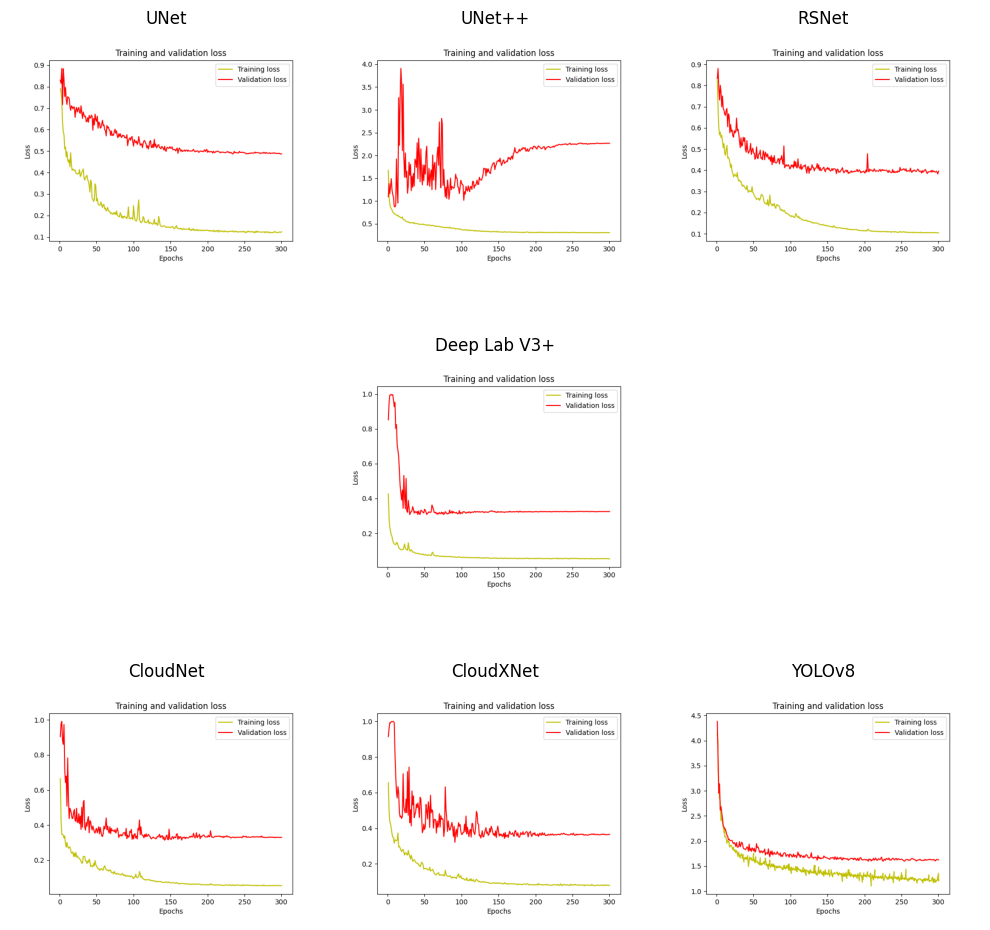

In [45]:
# Comparison of the loss functions
image1 = mpimg.imread(project_root_path / 'logs/fit/UNet_SPARCS_epochs300_batch16_RGBNIR/20230829-195335/loss.png')
image2 = mpimg.imread(project_root_path / 'logs/fit/UNetPlusPlus_SPARCS_epochs300_batch16_RGBNIR/20230829-202559/loss.png')
image3 = mpimg.imread(project_root_path / 'logs/fit/RSNet_SPARCS_epochs300_batch16_RGBNIR/20230830-081320/loss.png')
image4 = mpimg.imread(project_root_path / 'logs/fit/DLV3_SPARCS_epochs300_batch16_RGB/20230829-184722/loss.png')
image5 = mpimg.imread(project_root_path / 'logs/fit/CloudNet_SPARCS_epochs300_batch16_RGBNIR/20230829-222828/loss.png')
image6 = mpimg.imread(project_root_path / 'logs/fit/CloudXNet_SPARCS_epochs300_batch16_RGB/20230830-001738/loss.png')
image7 = mpimg.imread(project_root_path / 'results/yolov8n_pre_epochs300_batch16_SPARCS/loss.png')

# Create a 3x3 subplot arrangement
plt.figure(figsize=(10, 10))  

# First row
plt.subplot(331)
plt.imshow(image1)
plt.axis('off')
plt.title('UNet')

plt.subplot(332)
plt.imshow(image2)
plt.axis('off')
plt.title('UNet++')

plt.subplot(333)
plt.imshow(image3)
plt.axis('off')
plt.title('RSNet')

# Second row
plt.subplot(335)
plt.imshow(image4)
plt.axis('off')
plt.title('Deep Lab V3+')

# Third row
plt.subplot(337)
plt.imshow(image5)
plt.axis('off')
plt.title('CloudNet')

plt.subplot(338)
plt.imshow(image6)
plt.axis('off')
plt.title('CloudXNet')

plt.subplot(339)
plt.imshow(image7)
plt.axis('off')
plt.title('YOLOv8')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Predictions

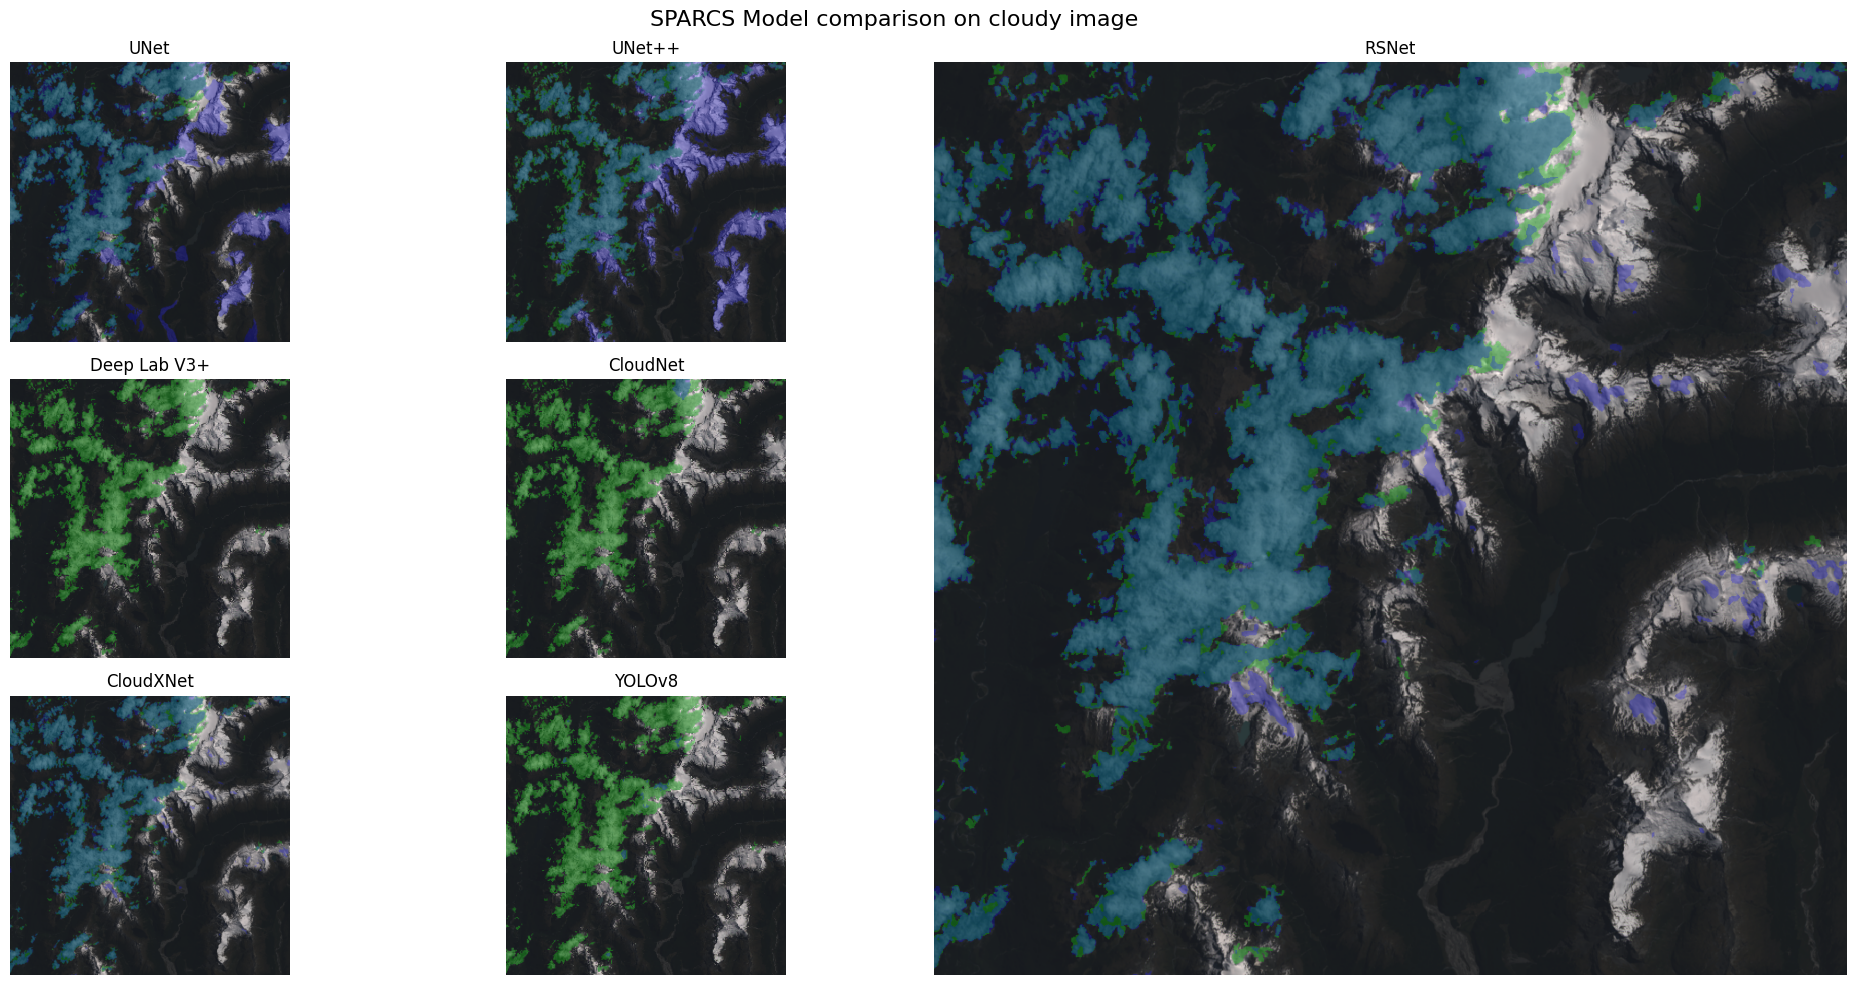

In [46]:
# Create a 3x3 subplot arrangement
dataset = 'SPARCS'
img = 'img_1_over_2.png'
image1 = mpimg.imread(results_path / f'UNet_SPARCS_epochs300_batch16_RGBNIR/{dataset}/{img}')
image2 = mpimg.imread(results_path / f'UNetPlusPlus_SPARCS_epochs300_batch16_RGBNIR/{dataset}/{img}')
image4 = mpimg.imread(results_path / f'DLV3_SPARCS_epochs300_batch16_RGB/{dataset}/{img}')
image5 = mpimg.imread(results_path / f'CloudNet_SPARCS_epochs300_batch16_RGBNIR/{dataset}/{img}')
image6 = mpimg.imread(results_path / f'CloudXNet_SPARCS_epochs300_batch16_RGB/{dataset}/{img}')
image3 = mpimg.imread(results_path / f'yolov8n_pre_epochs300_batch16_SPARCS/{dataset}/{img}')
image7 = mpimg.imread(results_path / f'RSNet_SPARCS_epochs300_batch16_RGBNIR/{dataset}/{img}')


# Create layout
layout = [
    ["A", "B", "G", "G"],
    ["C", "D", "G", "G"],
    ["E", "F", "G", "G"]
]

# Create figure
fig, axd = plt.subplot_mosaic(layout, figsize=(20,10))

# Plot the data on the subplots
axd['A'].imshow(image1) # creates a 2-D image
axd['A'].set_title('UNet')
axd['A'].axis('off')

axd['B'].imshow(image2) # creates a 2-D image
axd['B'].set_title('UNet++')
axd['B'].axis('off')

axd['C'].imshow(image3) # creates a 2-D image
axd['C'].set_title('Deep Lab V3+')
axd['C'].axis('off')

axd['D'].imshow(image4) # creates a 2-D image
axd['D'].set_title('CloudNet')
axd['D'].axis('off')

axd['E'].imshow(image5) # creates a 2-D image
axd['E'].set_title('CloudXNet')
axd['E'].axis('off')

axd['F'].imshow(image6) # creates a 2-D image
axd['F'].set_title('YOLOv8')
axd['F'].axis('off')

axd['G'].imshow(image7) # creates a 2-D image
axd['G'].set_title('RSNet')
axd['G'].axis('off')

fig.suptitle('SPARCS Model comparison on cloudy image', fontsize=16)

plt.tight_layout()
plt.show()

# Models trained with Biome

## Losses

In [47]:
losses = [dir for dir in glob.glob(str(project_root_path / 'logs/fit/*biome*/*/loss.png'))]
losses

['/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/DLV3_biome8_epochs100_batch16_RGB/20230826-083728/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/CloudXNet_biome8_epochs100_batch16_RGB/20230824-225820/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/RSNet_biome8_epochs100_batch16_RGBNIR/20230826-150857/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/CloudNet_biome8_epochs100_batch16_RGB/20230830-223853/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/CloudNet_biome8_epochs100_batch16_RGBNIR/20230825-153333/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/UNetPlusPlus_biome8_epochs100_batch16_RGBNIR/20230827-080751/loss.png',
 '/home/floddo/cloud_coverage_TOELT_SUPSI/logs/fit/UNet_biome8_epochs100_batch16_RGBNIR/20230829-185159/loss.png']

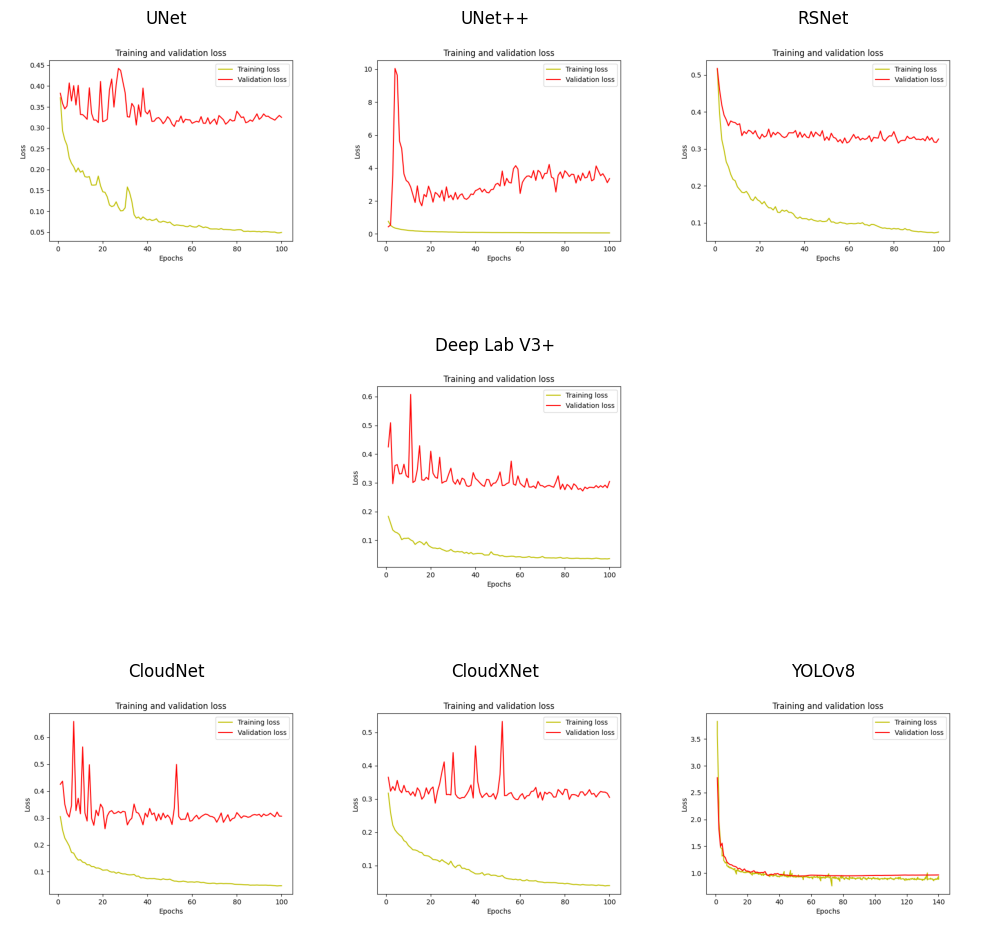

In [48]:
image1 = mpimg.imread(project_root_path / 'logs/fit/UNet_biome8_epochs100_batch16_RGBNIR/20230829-185159/loss.png')
image2 = mpimg.imread(project_root_path / 'logs/fit/UNetPlusPlus_biome8_epochs100_batch16_RGBNIR/20230827-080751/loss.png')
image3 = mpimg.imread(project_root_path / 'logs/fit/RSNet_biome8_epochs100_batch16_RGBNIR/20230826-150857/loss.png')
image4 = mpimg.imread(project_root_path / 'logs/fit/DLV3_biome8_epochs100_batch16_RGB/20230826-083728/loss.png')
image5 = mpimg.imread(project_root_path / 'logs/fit/CloudNet_biome8_epochs100_batch16_RGBNIR/20230825-153333/loss.png')
image6 = mpimg.imread(project_root_path / 'logs/fit/CloudXNet_biome8_epochs100_batch16_RGB/20230824-225820/loss.png')
image7 = mpimg.imread(project_root_path / 'results/yolov8n_pre_epochs300_batch16_Biome/loss.png')

# Create a 3x3 subplot arrangement
plt.figure(figsize=(10, 10)) 

# First row
plt.subplot(331)
plt.imshow(image1)
plt.axis('off')
plt.title('UNet')

plt.subplot(332)
plt.imshow(image2)
plt.axis('off')
plt.title('UNet++')

plt.subplot(333)
plt.imshow(image3)
plt.axis('off')
plt.title('RSNet')

# Second row
plt.subplot(335)
plt.imshow(image4)
plt.axis('off')
plt.title('Deep Lab V3+')

# Third row
plt.subplot(337)
plt.imshow(image5)
plt.axis('off')
plt.title('CloudNet')

plt.subplot(338)
plt.imshow(image6)
plt.axis('off')
plt.title('CloudXNet')

plt.subplot(339)
plt.imshow(image7)
plt.axis('off')
plt.title('YOLOv8')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

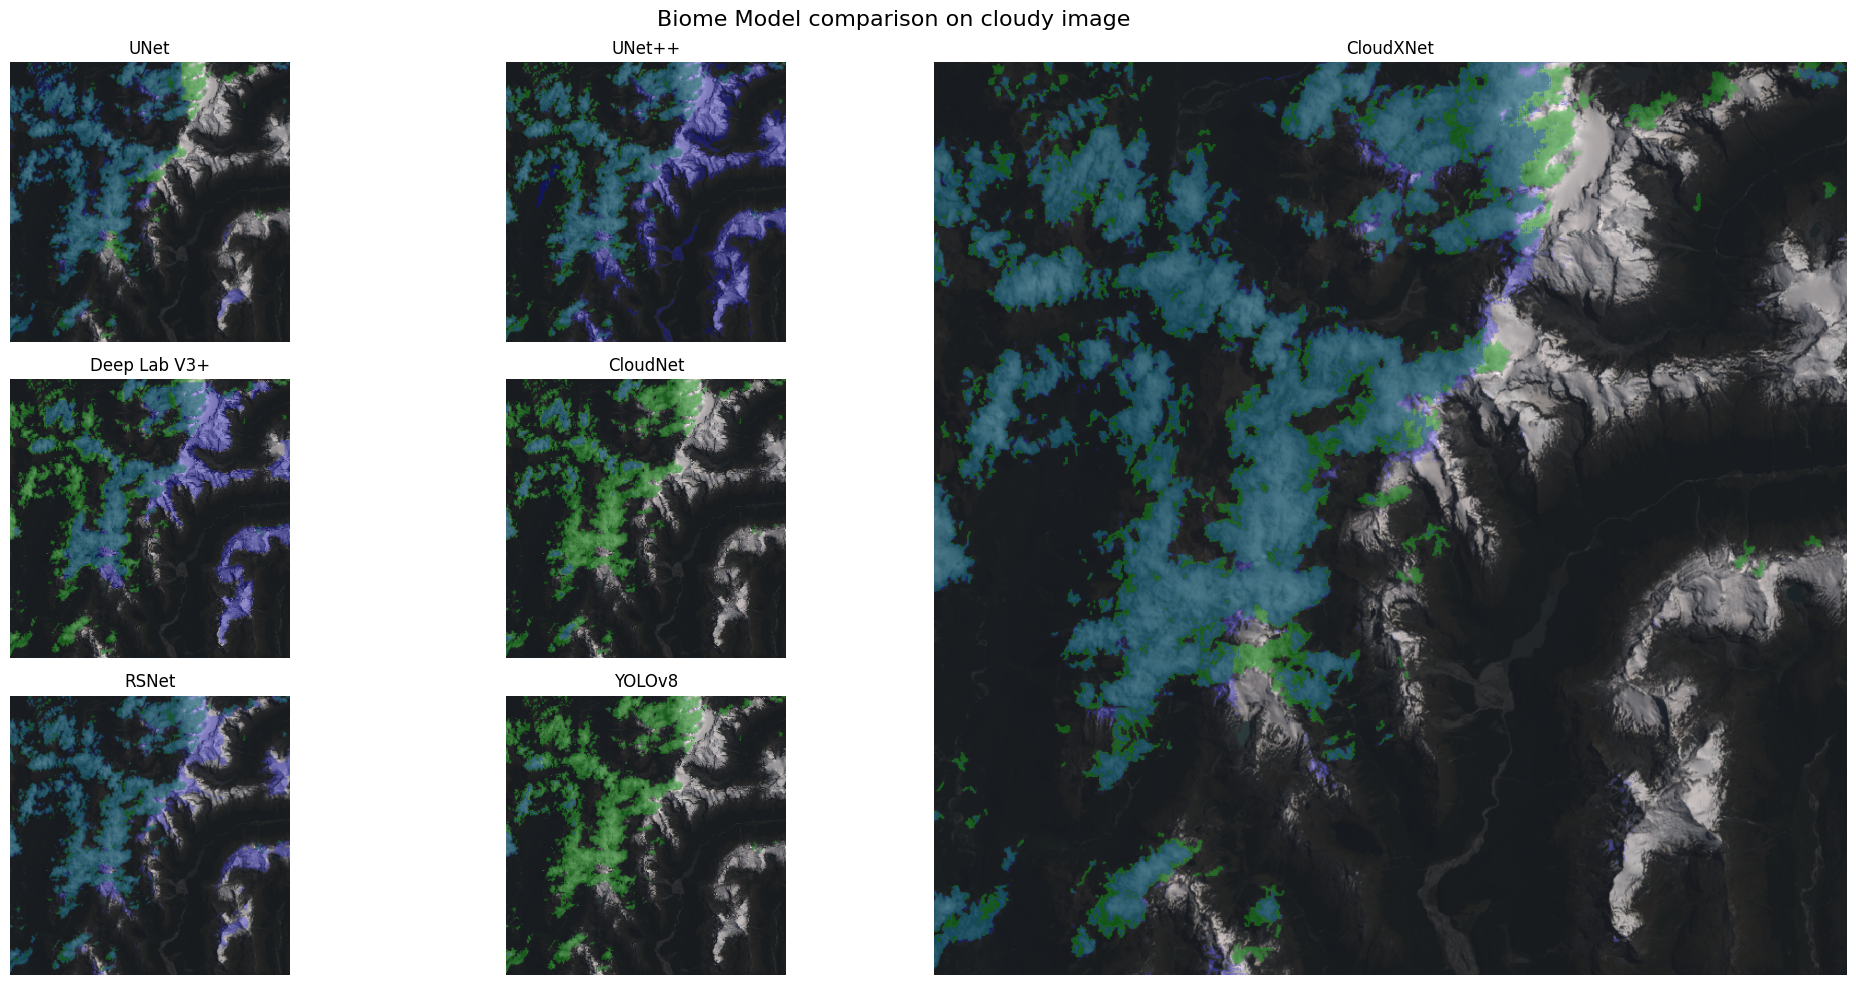

In [49]:
dataset = 'SPARCS'
img = 'img_1_over_2.png'
image1 = mpimg.imread(results_path / f'UNet_biome8_epochs100_batch16_RGBNIR/{dataset}/{img}')
image2 = mpimg.imread(results_path / f'UNetPlusPlus_biome8_epochs100_batch16_RGBNIR/{dataset}/{img}')
image4 = mpimg.imread(results_path / f'DLV3_biome8_epochs100_batch16_RGB/{dataset}/{img}')
image5 = mpimg.imread(results_path / f'CloudNet_biome8_epochs100_batch16_RGBNIR/{dataset}/{img}')
image6 = mpimg.imread(results_path / f'CloudXNet_biome8_epochs100_batch16_RGB/{dataset}/{img}')
image3 = mpimg.imread(results_path / f'yolov8n_pre_epochs300_batch16_Biome/{dataset}/{img}')
image7 = mpimg.imread(results_path / f'RSNet_biome8_epochs100_batch16_RGBNIR/{dataset}/{img}')


# Create layout
layout = [
    ["A", "B", "G", "G"],
    ["C", "D", "G", "G"],
    ["E", "F", "G", "G"]
]

# Create figure
fig, axd = plt.subplot_mosaic(layout, figsize=(20,10))

# Plot the data on the subplots
axd['A'].imshow(image1) # creates a 2-D image
axd['A'].set_title('UNet')
axd['A'].axis('off')

axd['B'].imshow(image2) # creates a 2-D image
axd['B'].set_title('UNet++')
axd['B'].axis('off')

axd['C'].imshow(image3) # creates a 2-D image
axd['C'].set_title('Deep Lab V3+')
axd['C'].axis('off')

axd['D'].imshow(image4) # creates a 2-D image
axd['D'].set_title('CloudNet')
axd['D'].axis('off')

axd['E'].imshow(image7) # creates a 2-D image
axd['E'].set_title('RSNet')
axd['E'].axis('off')

axd['F'].imshow(image6) # creates a 2-D image
axd['F'].set_title('YOLOv8')
axd['F'].axis('off')

axd['G'].imshow(image5) # creates a 2-D image
axd['G'].set_title('CloudXNet')
axd['G'].axis('off')

fig.suptitle('Biome Model comparison on cloudy image', fontsize=16)

plt.tight_layout()

plt.show()